# Titanic dataset analysis

#### Author: Romullo Ferreira

The aim of this project is to analyse the Kaggle Titanic dataset, which includes the following steps:

1. Business Questions (Business Understanding)
2. Data Understanding
3. Data wrangling
    - 3.1. Gather
    - 3.2. Assess
    - 3.3. Prepare Data (Clean)
4. Data exploration and visualization (Data Modeling).
5. Evaluate the Results.

## 3.1. Gather

Firstly, let's import the necessary libraries for this project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import CSV file

In [2]:
df_titanic = pd.read_csv('titanic-data-6.csv', sep=',')

## 3.2. Assess

Maybe it is difficult to analyze a large data set, but if we analyze smaller samples we can answer some questions at the beginning.

##### Let's take a first look at the data using the head() function. That returns the first 5 lines of the dataframe.

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### We can also return the last 5 lines of the dataframe using the tail() function.

In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### Descriptive statistics are useful for each column of data.
The describe() function gives us an idea of the mean of all our columns and other useful information like Max and Min.

In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Returning the dimensions of the dataframe

In [6]:
df_titanic.shape

(891, 12)

Dataframe dimensions. Just above we can see that the dataframe has 891 rows and 12 columns.

##### Using the info () function we will display a concise summary of the dataframe, including the number of non-null values in each column, see if they have missing values and the types of data for each resource

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can see, the Age, Cabin and Embarked columns have missing values.

##### What are the data types of the columns? We can also see data types with the dtypes.

In [8]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I believe that we have no problem with data types.
The Age variable is float because there are children on board under the age of 1. Let's leave it at that.

##### Let's see the number of unique values for each column.

In [9]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##### Are there duplicate rows? Using the function 'sum' with the function duplicated we can check this information.

In [10]:
sum(df_titanic.duplicated())

0

It looks like we don't have any duplicate rows, this is very good.

## 3.3. Prepare Data (Clean)

### #Missing values (Fixing NaN data values in the Age column.)

- There are missing values at Age column

##### Define

- We use the fillna method to correct missing data in the Age column.

##### Code

In [11]:
mean = df_titanic['Age'].mean()
df_titanic['Age'].fillna(mean, inplace=True)

##### Test

In [12]:
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Nice! We solved the problem at the Age column.

### ##Delete columns 

- The Cabin column also has missing values, but I chose to delete it because I will not use it in this project. 

##### Define

- We will delete the Cabin column.

##### Code

In [13]:
drop_column = ['Cabin']
df_titanic.drop(drop_column, axis=1, inplace = True)

##### Test

In [14]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Great! Cabin column successfully deleted!

## 4. Data exploration and visualization (Data Modeling)

##### a. -What was the median age of passengers on board?

In [24]:
def column_median(data_column):
    """
    Funtion column_median.
    Argss:
        data_column: Parameter that takes the column that we want to take the median.
        
    Returns:
        The median of the data in the chosen column.

    """
    column = df_titanic[data_column].median()
    
    return column

print("\nMedian age column")
print(column_median('Age'))


Median age column
29.69911764705882


We can see that the median was young people, 29 years old.

##### b. -What was the median class of passengers on board?

In [16]:
#Reuse of the column_median function
print("\nMedian class column")
print(column_median('Pclass'))


Median class column
3.0


As we can see the median of people was class 3. People of the lowest class.

##### c- What is the mean sex of the passengers who survived?

We will use the Groupby function to group data

In [17]:
#Correlation between Sex and Survived
df_titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


As we can see above, women survived more than men.

##### d- What class of passengers survived?

In [18]:
#Correlation between Pcclass and Survived
df_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


As we can see above, more than 50% of class 1 survived.

##### e- What is the mean age of the passengers who survived?

Text(232.775,0.5,'pessoas')

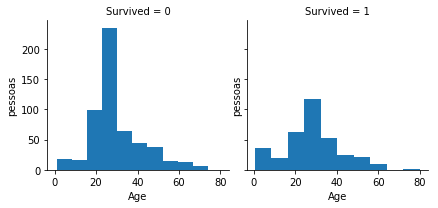

In [20]:
#HISTOGRAM CHART
#Left side of the graph shows the age of the passengers who died and the right side shows the age of the passengers who survived
grafico_sobreviventes_idade = sns.FacetGrid(df_titanic, col='Survived')

grafico_sobreviventes_idade.map(plt.hist, 'Age', bins=10).set_ylabels('pessoas')

plt.ylabel('pessoas', fontsize=10)

As we can see, most of the dead were young people, probably because there were more young people on board than old people and children.

And on the right we found that most of the survivors were young people. 

We also found that young children also had a higher survival rate than older people.

##### f- What were the factors that made people survive?

After analyzing the data above, we found that several factors influenced some people to survive. Female gender is an important factor, social class (socio-economic) and age (young and young children between 20 and 40 years old).